
<h1 align="center"> Web Scraping Project </h1>
<br>
<center align="left"> <font size='4'>  website to be scraped: </font><font size='4' color='#33AAFBD'>LinkedIn Job Search</font></center>
<br>

----------

# Table of Content
- [Part 1. Web scraping from linkedin job search website](#Part-1.-Web-scraping-from-linkedin-job-search-website)
   - [1.1 Import all needed libraries/modules/functions and define custom functions](#1.1-Import-all-needed-libraries/modules/functions-and-define-custom-functions)
      - [1.1.1 Import all needed libraries/modules/functions](#1.1.1-Import-all-needed-libraries/modules/functions)
      - [1.1.2 Define custom functions](#1.1.2-Define-custom-functions)
   - [1.2 Main code body](#1.2-Main-code-body)
      - [1.2.1 Initialization and filtering](#1.2.1-Initialization-and-filtering)
      - [1.2.2 Navigate to linkedin job search website](#1.2.2-Navigate-to-linkedin-job-search-website)
      - [1.2.3 Extract information from the first page](#1.2.3-Extract-information-from-the-first-page)
      - [1.2.4 Loop the navigator from page to page](#1.2.4-Loop-the-navigator-from-page-to-page)
      - [1.2.5 Save the extraction results into a dataframe](#1.2.5-Save-the-extraction-results-into-a-dataframe)
      - [1.2.6 Write to csv file](#1.2.6-Write-to-csv-file)
- [Part 2. Data cleaning and processing](#Part-2.-Data-cleaning-and-processing)
   - [2.1 Import all needed libraries/modules/functions and define variables and custom functions](#2.1-Import-all-needed-libraries/modules/functions-and-define-variables-and-custom-functions)
      - [2.1.1 Import all needed libraries/modules/functions](#2.1.1-Import-all-needed-libraries/modules/functions)
      - [2.1.2 Define variables](#2.1.2-Define-variables)
      - [2.1.3 Define custom functions](#2.1.3-Define-custom-functions)
   - [2.2 Main Code Body](#2.2-Main-Code-Body)
      - [2.2.1 Read the csv files from webscraping by pandas](2.2.1-Read-the-csv-files-from-webscraping-by-pandas)
      - [2.2.2 Concatenate all obtained dataframes from different job types and drop the duplicated recordings](#2.2.2-Concatenate-all-obtained-dataframes-from-different-job-types-and-drop-the-duplicated-recordings)
      - [2.2.3 Clean and process column 'location'](#2.2.3-Clean-and-process-column-'location')
      - [2.2.4 Clean and process columns 'competition' and 'industry domain'](#2.2.4-Clean-and-process-columns-'competition'-and-'industry-domain')
      - [2.2.5 Extract years of experience information from column 'about_job'](#2.2.5-Extract-years-of-experience-information-from-column-'about_job')
      - [2.2.6 Extract payrange information from column 'about_job'](#2.2.6-Extract-payrange-information-from-column-'about_job')
- [Part 3. Data Analysis](#Part-3.-Data-Analysis) 
   - [3.1 Import all needed libraries/modules/functions and define variables and  custom functions](#3.1-Import-all-needed-libraries/modules/functions-and-define-variables-and--custom-functions)
      - [3.1.1 Import all needed libraries/modules/functions](#3.1.1-Import-all-needed-libraries/modules/functions)
      - [3.1.2 Define variables](#3.1.2-Define-variables)
      - [3.1.3 Define custom functions](#3.1.3-Define-custom-functions)
   - [3.2 Main code body](#3.2-Main-code-body)
      - [3.2.1 Location and work modality analysis](#3.2.1-Location-and-work-modality-analysis)
      - [3.2.2  Industry domain analysis](#3.2.2--Industry-domain-analysis)
      - [3.2.3 Salary analysis](#3.2.3-Salary-analysis)
   

## Part 1. Web scraping from linkedin job search website

### 1.1 Import all needed libraries/modules/functions and define custom functions

#### 1.1.1 Import all needed libraries/modules/functions

In [49]:
from selenium.common.exceptions import TimeoutException, StaleElementReferenceException, NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import time
import numpy as np
import re
from functools import partial
from urllib.parse import urlencode
from selenium.webdriver.common.action_chains import ActionChains
import pandas as pd

#### 1.1.2 Define custom functions

In [730]:
#define a function to navigate to a website based on the specific parameters
def navigate_to_page (jobtype, params):
# define the base URL
    base_url = 'https://www.linkedin.com/jobs/search'
# combine base URL and parameters together
    url_with_params = f"{base_url}?{urlencode(params)}"
    driver.get(url_with_params)
    WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.TAG_NAME, 'body')))
    return driver

In [731]:
# define a function to login to  linkedin account
def login_linkedin(driver):
#find the login element
    login=driver.find_element(By.XPATH, '/html/body/div[1]/header/nav/div/a[2]')
    login.click()
#input user account and password 
    input_email_bar=driver.find_element(By.XPATH, '//*[@id="username"]')
    input_email_bar.send_keys('cclina521@gmail.com')
    input_password_bar=driver.find_element(By.XPATH,'//*[@id="password"]')
    input_password_bar.send_keys('ccnature520')
#sign in
    signin_button=driver.find_element(By.XPATH, '//*[@id="organic-div"]/form/div[3]/button')
    signin_button.click()

In [733]:
#define a function to extract job listing information     
def retry_click(job_title_element, max_attempts=20):
    attempt = 0
    while attempt < max_attempts:
        try:
            # Scroll to the element to ensure it's in view
            actions = webdriver.ActionChains(driver)
            actions.move_to_element(job_title_element).perform()

            # Click the element and wait for loading
            job_title_element.click()
            WebDriverWait(driver, 15).until(EC.presence_of_element_located((By.TAG_NAME,'body')))
            #extract job title
            title=job_title_element.find_element(By.TAG_NAME,'span').find_element(By.TAG_NAME,'strong').text
            #extract job location
            location=driver.find_element(By.XPATH, '//*[@id="main"]/div/div[2]/div[2]/div/div[2]/div/div[1]/div/div[1]/div/div[1]/div[1]/div[3]/div/span[1]').text
           #extract number of applicants 
            competition=driver.find_element(By.XPATH, '//*[@id="main"]/div/div[2]/div[2]/div/div[2]/div/div[1]/div/div[1]/div/div[1]/div[1]/div[3]/div/span[5]').text
           #extract work model:
            modelandlevel_text=driver.find_element(By.XPATH, '//*[@id="main"]/div/div[2]/div[2]/div/div[2]/div/div[1]/div/div[1]/div/div[1]/div[1]/div[4]/ul/li[1]').text
            modality_pattern=re.compile(r'(remote|hybrid|in[\s-]person|on[\s-]site)', re.IGNORECASE)
            work_modality=modality_pattern.findall(modelandlevel_text)     
           #extract company name:
            company_name=driver.find_element(By.XPATH, '//*[@id="main"]/div/div[2]/div[2]/div/div[2]/div/div[1]/div/div[1]/div/div[1]/div[1]/div[1]/div/div').text
          #extract industry domain:
            industry_domain=driver.find_element(By.XPATH,'//*[@id="main"]/div/div[2]/div[2]/div/div[2]/div/div[1]/div/section/section/div[1]/div[2]').text
        #extract About the job section for more information (like salary information)
            about_job=driver.find_element(By.XPATH, '//*[@id="job-details"]').text
            return  [jobtype, title, location, competition, work_modality, company_name, industry_domain,about_job]
        # handle the StaleElementReferenceException error in dynamic page
        except StaleElementReferenceException:
            attempt += 1
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
        # handle the NoSuchElementException error in dynamic page
        except NoSuchElementException:
            attempt += 1
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))

In [734]:
# define a function to scroll to the end of the page for full content loading
def wait_for_full_load(driver):
#Find the specific scrollable element by CSS selector
    scrollable_element = driver.find_element(By.CSS_SELECTOR, "#main > div > div.scaffold-layout__list-detail-inner.scaffold-layout__list-detail-inner--grow > div.scaffold-layout__list > div")
#Get the initial height of the scrollable element
    last_height = driver.execute_script("return arguments[0].scrollHeight;", scrollable_element)
#Scroll within the scrollable element
    while True:
    #Scroll down to the bottom of the scrollable element
        driver.execute_script("arguments[0].scrollTo(0, arguments[0].scrollHeight);", scrollable_element)
    #Wait for some time to load more content
        time.sleep(5)
    #Calculate new height and check if it has changed
        new_height = driver.execute_script("return arguments[0].scrollHeight;", scrollable_element)
        if new_height == last_height:
            break
        last_height = new_height

In [735]:
#define a function to try to extract the full job listings in the current page. 
#Maybe due to the dynamic page setting, based on my observation, I noticed:
#even by scrolling down to the end, not all the job listings can be loaded properly(some middle ones are missing),
#even by setting 10 min static sleep after scrolling, the current page job listings still wouldnt be updated, unless I do multiple attempts as below:
def retry_fullpage_extraction(driver, max_attem=3,sleep_period=15):  #max_attem and sleep_period are adjustable
    attem=0
    while attem<max_attem:
        attem+=1
        # define cp_job_listings as the found list of all job title links in current page
        cp_job_listings=driver.find_elements(By.XPATH,"//a[contains(@class, 'job-card-list__title--link')]")
        # the first few attempts are only to help for more loading
        if attem<max_attem:
            for item in cp_job_listings:
                item.click()
                time.sleep(np.random.randint(1,sleep_period))
        # after a few times of tries, assume as many as possible job listings have been properly loaded, 
        # in the last try, to save all the extracted information into recordings
        else:
            for item in cp_job_listings:
                job_title_element=item
                recordings.append(retry_click(job_title_element))
        time.sleep(np.random.randint(1,10))
    return len(cp_job_listings)   

### 1.2 Main code body

#### 1.2.1 Initialization and filtering

In [1103]:
#initialization 
recordings=[]
jobtype='Machine Learning Engineer'
# filter the job search results by only displaying the job posts from past month in canada
params = {'f_TPR':'r2592000', 'keywords': jobtype, 'location': 'Canada','start':0} 

#### 1.2.2 Navigate to linkedin job search website

In [1104]:
driver = webdriver.Chrome()
navigate_to_page(jobtype, params)
login_linkedin(driver)

#### 1.2.3 Extract information from the first page

In [ ]:
wait_for_full_load(driver)
retry_fullpage_extraction(driver)

#### 1.2.4 Loop the navigator from page to page

In [ ]:
#loop the navigate from page to page
while True:
    try:
        time.sleep(np.random.randint(10,60))
        params['start']+=25
        navigate_to_page(jobtype,params)
        WebDriverWait(driver,20).until(EC.presence_of_element_located((By.TAG_NAME,'body')))
        wait_for_full_load(driver)
        retry_fullpage_extraction(driver)
        time.sleep(np.random.randint(5,15))
    except Exception as e:
        print('next page is not found:', e)
        break

#### 1.2.5 Save the extraction results into a dataframe

In [717]:
# remove all None elements in recordings
recordings=[i for i in recordings if i is not None]

In [ ]:
ML_df=pd.DataFrame(recordings,  columns=['jobtype', 'title', 'location', 'competition', 'work_modality', 'company_name', \
                                         'industry_domain','about_job'])

#### 1.2.6 Write to csv file

In [720]:
ML_df.to_csv('ML_webscrapinglinkedin.csv')

## Part 2. Data cleaning and processing

### 2.1 Import all needed libraries/modules/functions and define variables and custom functions

#### 2.1.1 Import all needed libraries/modules/functions 

In [3]:
import pandas as pd
import numpy as np
import re
from unidecode import unidecode

#### 2.1.2 Define variables

In [4]:
#define province_map to map province full name to its abbreviation
province_map = {
    'ONTARIO': 'ON',
    'ALBERTA': 'AB',
    'NOVA SCOTIA': 'NS',
    'NEW BRUNSWICK': 'NB',
    'BRITISH COLUMBIA': 'BC',
    'QUEBEC': 'QC',
    'SASKATCHEWAN': 'SK',
    'MANITOBA': 'MB',
    'PRINCE EDWARD ISLAND': 'PE',
    'NORTHWEST TERRITORIES': 'NT',
    'NUNAVUT': 'NU'
}

In [5]:
# define industry domain categories
domain_categories={
'Technology':['software', r'\bIT\b',r'\bAI\b', 'information', 'cybersecurity', 'network security', 'cloud', 'big data', 'blockchain', 'data infrastructure'], 
'Finance': ['finance','financial','investment','insurance','bank','banking', 'capital', 'accounting'],
'Healthcare': ['healthcare','hospitals','health', 'clinical', 'wellness', 'patient care','pharmaceutical','biotechnology','medicine', 'medical'],
'Retail':['retail','E-commerce','shopping', 'wholesale', 'goods',  'sales'], 
'Telecommunication':['telecommunication','telecom','mobile', 'wireless', 'broadband', 'satellite', 'fiber optics','internet'],
'Manufacturing': ['manufacturing','manufacturers','automotive','automation','autonomous vehicle','electronics','industrial', 'production', 'factories', 'machinery'],
'Energy': ['energy','utilities','oil','gas','renewable energy', 'solar power', 'wind power', 'nuclear energy', 'hydropower','electricity'],
'Transportation':['transportation','logistics','shipping','freight','airlines','railways','trucking', 'public transit', 'supply chain', 'delivery'],
'Media': ['media','voice','audio','video','radio','image','entertainment','broadcasting','streaming','music','film','computer games', 'social networking'],
'Education':['education','universities','colleges','schools', 'academia'],
'Government': ['government','public','federal','security','safety'],
'Business service':['consulting','advertising','advisory', 'marketing', 'branding', 'staffing', 'recruiting', 'human resources', 'research', 'professional services'],
'Agriculture':['agriculture','agritech','farming','food','crops', 'livestock', 'agronomy', 'fisheries'],
'Real Estate':['real estate','property','housing', 'construction'],
'Non-Profit Organizations':['non-profit','NGOs','charitable','charity', 'volunteer'],
'Tourism': ['travel', 'hospitality','tourism','hotels','resorts','cruise','museums'],
'Regulatory':['legal','compliance','law','regulatory', 'regulation']} 

In [50]:
# define years of experience categories
yoe_categories={
    '0-5 years': [0,5],
    '5-10 years': [5,10],
    '10-15 years': [10,15],
    '15+ years': [15,20]
}

#### 2.1.3 Define custom functions

In [8]:
# define a function to process each location value to generate the corresponding city and province information
def process_location(loc):
    city=np.nan
    province=np.nan 
    # Check if it matches the format "city, province abbreviation"
    match = re.match(r'^(.*?), ([A-Z]{2})$', loc)
    # if yes
    if match:
        if match.group(1) not in ['Quebec', 'Saskatoon']:
            city = match.group(1)
        province = match.group(2)
        return city, province
     #  if no
    else:
        #firstly to check for specific formats like "Canada" or "NAMER"
        if loc == 'Canada' or loc == 'NAMER':
            return city, province
        #secondaly to handle formats like "Greater city_name..."
        elif loc.startswith('Greater'):
            city=loc.removesuffix(', Canada').removesuffix(' Area').removesuffix(' Metropolitan')
            if re.search('Toronto', loc):
                province='ON'
            elif re.search('Montreal', loc):
                province='QC'
            elif re.search("St. John's", loc):
                province='NL'
            elif re.search('Vancouver', loc):
                province='BC'
            elif re.search('Calgary', loc):
                province='AB'
            elif re.search('Trois-Rivieres', loc):
                province='QC'
            return city, province
        #finally to handle other formats by splitting
        else:
            parts=loc.split(',')
            if len(parts)==2:
                province=parts[0]
            if len(parts)==3:
                province=parts[1]
                city=parts[0].removeprefix('City of ')
            if len(parts)==4:
                province=parts[2]
                city=','.join(parts[:2])
            return city, province    

In [9]:
# define a function to classify competition levels
def competition_category(item):
    try:
        num = int(re.search(r'\d+', item).group())
        thresholds = [
        (20, "<= 20 applicants"),
        (40, " >20, <= 40 applicants"),
        (60, ">40, <=60 applicants"),
        (80, ">60, <=80 applicants"),
        (99, ">80, <100 applicants"),
        (100, '>100 applicants')
    ]
        for threshold, category in thresholds:
            if num <= threshold:
                return category
    except AttributeError:
        return "No applicants found"  

In [10]:
# define a function to classfiy industry domains
def industry_domain_category(item):
    if pd.notna(item):
        dom = []
        compiled_patterns = {key: [re.compile(value, re.IGNORECASE) for value in domain_categories[key]] for key in domain_categories}
        for key in compiled_patterns:
            for pattern in compiled_patterns[key]:
                if pattern.findall(item):
                    dom.append(key)
                    break
        
        return ','.join(dom) if dom else 'Others'
    
    else:
        return np.nan

In [11]:
# define a function to extract information related to years of experience from about_job section
def YOE_full(item):
    yoe=np.nan
    pattern=re.compile(r'\d+.*year.*experience.*', re.IGNORECASE)
    results=pattern.findall(item)
    if results:
        yoe=results     
    return yoe

In [12]:
# define a function to further extract the years of experience from the column of 'yoe_full'
def YOE_shorten(item):
    if isinstance(item, list) and any(pd.notna(x) for x in item):
        results=[]
# from column 'yoe_full', summarize the new pattern to extract the years of experience info more accurately
        pattern=re.compile(r'\b\d+[)]?\s*(?:\+|or more|~|-|to)?(?:\s*\d+)?[\+]?\s*years\b', re.IGNORECASE)
        for element in item:
            results.extend(pattern.findall(element))
        if results:
            return results
        else:
            return np.nan
    else:
        return np.nan

In [13]:
#define a function to finally extract the years of experience from the column 'yoe_shorten'
def YOE_final(x):
    if isinstance(x, list) and any(pd.notna(item) for item in x):
    # remove duplicated elements
        x = list(set(x))
    # define patterns for the years of experience range and for the single years of experience
        range_pattern = re.compile(r'(\d+)\s*(?:-|~|to)\s*(\d+)', re.IGNORECASE)
        single_year_pattern = re.compile(r'(\d+)')

        result = []
        
        for item in x:
            match = range_pattern.search(item)
            # if item is a yoe range, extract the boundary numbers and put into a tuple
            if match:
                result.append((int(match.group(1)), int(match.group(2))))
            # if not, extract the single yoe number
            else:
                single_match = single_year_pattern.search(item)
            #  based on observasion, the numbers >=20 usually not represent the yoe requirement for applicants.
                if int(single_match.group(1)) < 20:
                    result.append(int(single_match.group(1)))
        
        if not result:
            return np.nan
        else:
            # from about_job section, we usually can extract multiple pieces for years of experience information
            # since the recruiter can have different years of experience requirements on industry domain and technical scope
            # for simplicity, I only save the maximum value as the final yoe requirement, since this can guarantee the valid application
           
        #extract all single_yoe numbers into partial_res1
            partial_res1 = [r for r in result if isinstance(r, int)]
        #extract all yoe range boundaries into partial_res2
            partial_res2 = [r for r in result if isinstance(r, tuple)]
        # if  both single_yoe numbers and yoe range exist, compare both and take the maximum value
            if partial_res1 and partial_res2:
                max_single = max(partial_res1)
                max_x = max(x[0] for x in partial_res2)
                max_y = max(x[1] for x in partial_res2)
                if max_single <= max_y:
                    final_result = f'{max_x}-{max_y} years'
                else:
                    final_result = f'{max_single} years'
            # if only the single_yoe numbers exist, take the maximum value
            elif partial_res1:
                final_result = f'{max(partial_res1)} years'
            # if only the yoe ranges exist, take the maximum value for both boundaries
            elif partial_res2:
                max_x = max(x[0] for x in partial_res2)
                max_y = max(x[1] for x in partial_res2)
                final_result = f'{max_x}-{max_y} years'
            return final_result
    else:
        return np.nan

In [14]:
# define a function to process the column 'yoe_final' so as to create a new column 'yoe_level' for  years of experience classification
def YOE_category(x):
    if pd.notna(x):
        # Define patterns for the years of experience range and for single years of experience
        range_pattern = re.compile(r'\b(\d+)-(\d+)\b')
        single_year_pattern = re.compile(r'\b(\d+)\b')
        
        range_match = range_pattern.match(x)
    # determine the category if x matches the range pattern
        if range_match:
            min_yoe, max_yoe = int(range_match.group(1)), int(range_match.group(2))
            for key, (lower, upper) in yoe_categories.items():
                if max_yoe <= upper:
                    break
            return key
        else:
        # determine the category if x matches the single year pattern
            single_match = single_year_pattern.match(x)
            yoe = int(single_match.group())
            for key, (lower, upper) in yoe_categories.items():
                if lower <= yoe < upper:
                    break
            return key
    else:
        return np.nan

In [16]:
# define a function to extract the information related to payment from column 'about_job'
def Pay_full(x):
    pattern=re.compile(r'.*\$\s*\d+.*(?:CAD)?')
    results=pattern.findall(x)
    if results:
        return results
    else:
        return np.nan

In [17]:
# define a function to further extract the payment information from column 'payment_full'
def Pay_shorten(x):
    if  isinstance(x, list) and any(pd.notna(item) for item in x):
    # define pattern1 with min: $\d+, mid: $\d+, max: $\d+ yearly salary format
        pattern1 = re.compile(
            r'(?:(?:min|mid|max):)\s*'                           # Match "min:", "mid:", or "max:" with optional spaces
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'        # Optional currency symbols with optional spaces
            r'\$\s*\d{2,3}[,]?\d{3}\s*'                          # Dollar sign followed by yearly pay format: 2 or 3 digits, optional comma, and 3 digits
            r'(?:CAD|C|CA|CAN|CDN|USD)?'            # Optional currency symbols
    , re.IGNORECASE
)
     # define pattern 2 with other yearly payment range format
        pattern2 = re.compile(
            r'(?:from|between|start rate)?\s*[:]?[\s]*'                    # Optional introductory phrases and optional colon
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'                              # Optional currency symbols
            r'\$\s*\d{2,3}[,]?(?:\d{3}|k)(?:\.\d{2,3})?\s*'             # Dollar sign followed by the yearly pay number format
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'                             # Optional currency symbols again
            r'(?:-|--|to|and|/year up to|to job rate)\s*[:]?[\s]*'    # Range indicators
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'                             # Optional currency symbols
            r'[\$]?\s*\d{2,3}[,]?(?:\d{3}|k)(?:\.\d{2,3})?\s*'        # Second part of the range number format
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'                            # Optional currency symbols again
            r'(?:/year)?'                                                                      # Optional yearly indicator
            r'\s*[(]?(?:CAD|C|CA|CAN|CDN|USD)?[)]?'               # Optional currency symbols in parentheses
    , re.IGNORECASE
)
     # define pattern 3 with hourly payment format
        pattern3 = re.compile(
            r'(?:from|between|start rate)?[:]?\s*'         # Optional introductory phrases and optional colon
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'          # Optional currency symbols
            r'\$\s*\d{2}(?:\.\d{2,3})?\s*'                       # Dollar sign followed by a specific hourly pay number format
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'        # Optional currency symbols again
            r'(?:/hour|/hr|per hour)?\s*'                     # Optional units
            r'(?:-|--|to|and|to job rate)?[:]?\s*'          # Optional Range indicators
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'       # Optional currency symbols
            r'\$\s*\d{2}?(?:\.\d{2,3})?\s*'                    # Optional Second part of the range number format
            r'(?:CAD|C|CA|CAN|CDN|USD)?'             # Optional currency symbols again
            r'(?:/hour|/hr|per hour)?',                         # Optional units
    re.IGNORECASE
)
    # define pattern 4 with weekly or monthly payment format
        pattern4 = re.compile(
            r'\$\s*\d{4}\s*'                                                   # Match dollar sign followed by a specific weekly/monthly pay number format: 4 digits
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'              # Optional currency symbols
            r'(?:/month|/week)',                                        # Match "/month" or "/week"
    re.IGNORECASE
)
                                    
        patterns=[pattern1, pattern2, pattern3, pattern4]
        results=[]
        
        for pattern in patterns:
            for item in x:
                results += pattern.findall(item)
            if results:
                break
            else:
                continue
        if results:
            return tuple(results)
        else:
            return np.nan


    else:
        return np.nan

In [18]:
# define a function to extract payment range from column 'payment_shorten' and create two columns 'payrange_from' and 'payrange_to'
def Pay_range_extraction(x):
    if isinstance(x, tuple) and any(pd.notna(item) for item in x):
       # define pattern1 with min: $\d+, mid: $\d+, max: $\d+ for yearly salary and extract  the numbers
        pattern1 = re.compile(
            r'(?:(?:min|mid|max):)\s*'                           # Match "min:", "mid:", or "max:" with optional spaces
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'        # Optional currency symbols with optional spaces
            r'\$\s*(\d{2,3}[,]?\d{3})\s*'                         # Dollar sign followed by yearly pay format: 2 or 3 digits, optional comma, and 3 digits
            r'(?:CAD|C|CA|CAN|CDN|USD)?'            # Optional currency symbols
    , re.IGNORECASE
)
       # define pattern2 with yearly salarly range and extract  the numbers
        pattern2 = re.compile(
            r'(?:from|between|start rate)?\s*[:]?[\s]*'                    # Optional introductory phrases and optional colon
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'                              # Optional currency symbols
            r'\$\s*(\d{2,3}[,]?(?:\d{3}|k)(?:\.\d{2,3})?)\s*'             # Dollar sign followed by the yearly pay number format
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'                             # Optional currency symbols again
            r'(?:-|--|to|and|/year up to|to job rate)\s*[:]?[\s]*'    # Range indicators
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'                             # Optional currency symbols
            r'[\$]?\s*(\d{2,3}[,]?(?:\d{3}|k)(?:\.\d{2,3})?)\s*'        # Second part of the range number format
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'                            # Optional currency symbols again
            r'(?:/year)?'                                                                      # Optional yearly indicator
            r'\s*[(]?(?:CAD|C|CA|CAN|CDN|USD)?[)]?'               # Optional currency symbols in parentheses
    , re.IGNORECASE
)
         # define pattern3 with hourly payrate range and extract the numbers
        pattern3 = re.compile(
            r'(?:from|between|start rate)?[:]?\s*'         # Optional introductory phrases and optional colon
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'          # Optional currency symbols
            r'\$\s*(\d{2}(?:\.\d{2,3})?)\s*'                     # Dollar sign followed by a specific hourly pay number format
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'        # Optional currency symbols again
            r'(?:/hour|/hr|per hour)?\s*'                     # Optional units
            r'(?:-|--|to|and|to job rate)[:]?\s*'          # Range indicators
            r'(?:CAD|C|CA|CAN|CDN|USD)?\s*'       # Optional currency symbols
            r'\$\s*(\d{2}(?:\.\d{2,3})?)\s*'                 # Second part of the range number format
            r'(?:CAD|C|CA|CAN|CDN|USD)?'          # Optional currency symbols again
            r'(?:/hour|/hr|per hour)?',                      # Optional units
    re.IGNORECASE
)
        # define a function to search patterns 2 (yearly range) and 3 (hourly range)  in each item
        def patterns2_3_payrange_search(item):
            match2 = pattern2.search(item)
            match3 = pattern3.search(item)
            result_from, result_to = np.nan, np.nan
            # if yearly range pattern is found, extract the two boundaries as from and to respectively
            if match2:
                result_from = float(match2.group(1).replace(',', '').replace('k', '000').replace('K', '000'))
                result_to = float(match2.group(2).replace(',', '').replace('k', '000').replace('K', '000'))
                # if the payment range is USD dollars, transform them to CND 
                if re.search('USD', item):
                    result_from *= 1.3
                    result_to *= 1.3
            # if hourly range pattern is found, convert them to yearly salary range and then extract the boundaries
            elif match3:
                result_from = float(match3.group(1)) * 40 * 50
                result_to = float(match3.group(2)) * 40 * 50
                if re.search('USD', item):
                    result_from *= 1.3
                    result_to *= 1.3
            return result_from, result_to
        
       # define a function to only return the items with CND sign 
        def CDollarSign_search(x):
            cdollarsign_pattern = re.compile(r'(?:CAD|C|CA|CAN|CDN)', re.IGNORECASE)
            return [item for item in x if cdollarsign_pattern.search(item)]
        
    # define a function to process an item with multiple pieces of payrange information
        def mul_payrange_process(lst):
            fr = []
            to = []
            for item in lst:
                if pattern2.search(item) or pattern3.search(item):
                    from_val, to_val = patterns2_3_payrange_search(item)
                    fr.append(from_val)
                    to.append(to_val)
        # for an item with multiple payranges, take the smallest lower boundary as the range start, the largest upper boundary  as the range to
            result_from = min(fr) if fr else np.nan
            result_to = max(to) if to else np.nan
            return result_from, result_to
    
    # if  the item only has one payment information
        if len(x)==1:
            #check whether they are payrange patterns. 
            if pattern2.search(x[0]) or pattern3.search(x[0]):
                result_from=patterns2_3_payrange_search(x[0])[0]
                result_to=patterns2_3_payrange_search(x[0])[1]
            else:
                result_from=np.nan
                result_to=np.nan  
        # if the item has three elements 
        elif len(x)==3:
            # check to see whether they match the min, mid, max payment pattern
            if pattern1.search(x[0]): #if yes, take the min as the range start, max as the range to
                result_from=float(pattern1.search(x[0]).group(1).replace(',','').replace('k','000').replace('K','000'))
                result_to=float(pattern1.search(x[2]).group(1).replace(',','').replace('k','000').replace('K','000'))
              # if not, compare these elements and determine the final range  
            else:
                # search for any CND signs
                update_Y=CDollarSign_search(x) 
                # if there exist elements with CND sign, focus on them only for processing since the others are with USD 
                if update_Y:
                    result_from=mul_payrange_process(update_Y)[0]
                    result_to=mul_payrange_process(update_Y)[1]
                # if no CND sign found, it implies all the elements should be with CND
                else:
                    result_from=mul_payrange_process(x)[0]
                    result_to=mul_payrange_process(x)[1]
        # determine the final payrange for all the other cases with different number of elements
        else:
            update_Y=CDollarSign_search(x)
            if update_Y:
                result_from=mul_payrange_process(update_Y)[0]
                result_to=mul_payrange_process(update_Y)[1]
            else:
                result_from=mul_payrange_process(x)[0]
                result_to=mul_payrange_process(x)[1]
        
        return result_from, result_to        
                   
    else:
        return np.nan, np.nan
    

### 2.2 Main Code Body

#### 2.2.1 Read the csv files from webscraping by pandas

In [19]:
DA_df=pd.read_csv('DA_linkedin_scrape.csv')
DS_df=pd.read_csv("DS_webscrapinglinkedin.csv")
DE_df=pd.read_csv("DE_webscrapinglinkedin.csv")
ML_df=pd.read_csv("ML_webscrapinglinkedin.csv")

#### 2.2.2 Concatenate all obtained dataframes from different job types and drop the duplicated recordings

In [20]:
#concatenate all obtained dataframes from different job types 
Tdf=pd.concat([DA_df, DS_df, DE_df, ML_df])
#replace all empty cell by np.nan
Tdf=Tdf.applymap(lambda x: np.nan if x=='' or x=='[]' else x)
#drop duplicated recordings
Tdf=Tdf.drop_duplicates(['title','location', 'company_name','industry_domain'])
#reset the index
Tdf=Tdf.reset_index(drop=True)

C:\Users\cclin\AppData\Local\Temp\ipykernel_22680\3198007334.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Tdf=Tdf.applymap(lambda x: np.nan if x=='' or x=='[]' else x)


#### 2.2.3 Clean and process column 'location'

In [21]:
#normalize 'location' column
Tdf['location']=Tdf['location'].apply(lambda x: unidecode(x))
#apply  process_location function to each value of the 'location' column and create two new columns
Tdf[['location_city', 'location_province']] = pd.DataFrame(Tdf['location'].apply(process_location).tolist(), index=Tdf.index)
#normalize city names
Tdf['location_city']=Tdf['location_city'].apply(lambda x: x.strip().capitalize() if pd.notna(x) else x)
#normalize province names
Tdf['location_province']=Tdf['location_province'].apply(lambda x: x.strip().upper() if pd.notna(x) else x)
Tdf['location_province']=Tdf['location_province'].replace(province_map)

#### 2.2.4 Clean and process columns 'competition' and 'industry domain'

In [22]:
#normalize 'about_job' column
Tdf['about_job']=Tdf['about_job'].apply(lambda x: unidecode(x))

In [23]:
#apply competition_category function to each value of the 'competition' column and create a new column of 'competition_level' 
Tdf['competition_level']=Tdf['competition'].apply(competition_category)

#apply industry_domain_category function to each value of the 'industry_domain' column and create a new column of 'domain_category' 
Tdf['domain_category']=Tdf['industry_domain'].apply(industry_domain_category)

#### 2.2.5 Extract years of experience information from column 'about_job'

In [24]:
# apply function YOE_full to exact detailed years of experience info from about_job section for each job listing
#create a new column of 'yoe_full'
Tdf['yoe_full']=Tdf['about_job'].apply(YOE_full)

# apply function YOE_shorten to column 'yoe_full' to extract years of experience more accurately
#create a new column of 'yoe_shorten'
Tdf['yoe_shorten']=Tdf['yoe_full'].apply(YOE_shorten)

# apply function YOE_final to column 'yoe_shorten' to finally extract the exact years of experience requirement information
#create a new column of 'yoe_final'
Tdf['yoe_final']=Tdf['yoe_shorten'].apply(YOE_final)

#apply function YOE_category to column 'yoe_final' to process the years of experience further to generate the yoe categories
#create a new column of 'yoe_level'
Tdf['yoe_level']=Tdf['yoe_final'].apply(YOE_category)

#### 2.2.6 Extract payrange information from column 'about_job'

In [26]:
#apply function Pay_full to column 'about_job' to extract detailed payment info and create a new column 'payment_full'
Tdf['payment_full']=Tdf['about_job'].apply(Pay_full)
#apply function Pay_shorten to column 'payment_full' to extract the payment information more concisely and create column 'payment_shorten'
Tdf['payment_shorten']=Tdf['payment_full'].apply(Pay_shorten)
#apply function Pay_range_extraction to 'payment_shorten' to obtain the payrange info and create columns 'payrange_from' and 'payrange_to' 
Tdf[['payrange_from', 'payrange_to']]=pd.DataFrame(Tdf['payment_shorten'].apply(Pay_range_extraction).tolist(), index=Tdf.index)

## Part 3. Data Analysis

### 3.1 Import all needed libraries/modules/functions and define variables and  custom functions

#### 3.1.1 Import all needed libraries/modules/functions

In [27]:
!pip install geopy
!pip install folium
!pip install plotly

In [ ]:
import folium
#to display plots inside of notebook
py.init_notebook_mode(connected=True) 
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import plotly.express as px
import re

#### 3.1.2 Define variables

In [29]:
center_latitude_ON=50.0000
center_longitude_ON=-85.0000
center_latitude_BC=53.7267
center_longitude_BC=-127.6476
center_latitude_AB=54.7267
center_longitude_AB=-113.4897
center_latitude_MB=54.9828
center_longitude_MB=-98.3495

In [30]:
color_map = {
'Data Analyst': '#636EFA',  # Blue
'Machine Learning Engineer': '#EF553B',  # Red
'Data Scientist': '#00CC96',  # Green
'Data Engineer': '#FFA500'  # Orange
}

In [31]:
domain_categories={
'Technology':['software', r'\bIT\b',r'\bAI\b', 'information', 'cybersecurity', 'network security', 'cloud', 'big data', 'blockchain', 'data infrastructure'], 
'Finance': ['finance','financial','investment','insurance','bank','banking', 'capital', 'accounting'],
'Healthcare': ['healthcare','hospitals','health', 'clinical', 'wellness', 'patient care','pharmaceutical','biotechnology','medicine', 'medical'],
'Retail':['retail','E-commerce','shopping', 'wholesale', 'goods',  'sales'], 
'Telecommunication':['telecommunication','telecom','mobile', 'wireless', 'broadband', 'satellite', 'fiber optics','internet'],
'Manufacturing': ['manufacturing','manufacturers','automotive','automation','autonomous vehicle','electronics','industrial', 'production', 'factories', 'machinery'],
'Energy': ['energy','utilities','oil','gas','renewable energy', 'solar power', 'wind power', 'nuclear energy', 'hydropower','electricity'],
'Transportation':['transportation','logistics','shipping','freight','airlines','railways','trucking', 'public transit', 'supply chain', 'delivery'],
'Media': ['media','voice','audio','video','radio','image','entertainment','broadcasting','streaming','music','film','computer games', 'social networking'],
'Education':['education','universities','colleges','schools', 'academia'],
'Government': ['government','public','federal','security','safety'],
'Business service':['consulting','advertising','advisory', 'marketing', 'branding', 'staffing', 'recruiting', 'human resources', 'research', 'professional services'],
'Agriculture':['agriculture','agritech','farming','food','crops', 'livestock', 'agronomy', 'fisheries'],
'Real Estate':['real estate','property','housing', 'construction'],
'Non-Profit Organizations':['non-profit','NGOs','charitable','charity', 'volunteer'],
'Tourism': ['travel', 'hospitality','tourism','hotels','resorts','cruise','museums'],
'Regulatory':['legal','compliance','law','regulatory', 'regulation']} 

#### 3.1.3 Define custom functions

In [32]:
# define a function to return the job listings distribution over different cities with a specified province
def job_dist_in_cities_of_specific_pro(df, province):
    df_up=df[df['location_province']==province]
    return df_up['location_city'].value_counts()

In [33]:
# define a function to return the city latitude and longitude 
def latitude_longitude_function(df_cities, province):
    cities=df_cities.index.tolist()
# Initialize Nominatim API
    geolocator = Nominatim(user_agent=f"{province}_geocoder")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
    
# Create columns for latitude and longitude
    df_cities['Latitude'] = None
    df_cities['Longitude'] = None

# Get coordinates for each city
    for city in cities:
        location = geocode(f"{city}, {province}, Canada")
        if location:
            df_cities.loc[city, ['Latitude', 'Longitude']] = location.latitude, location.longitude
        else:
            df_cities.loc[city, ['Latitude', 'Longitude']] = None, None
    return df_cities

In [34]:
#define a function to generate a map for displaying the job postings distribution across different cities in a specified province 
def map_generation(center_latitude, center_longitude, df_cities):


# Define a map with the specified center coordinates 
    map_result = folium.Map(location=[center_latitude, center_longitude], zoom_start=5)

# Add markers for Data Analyst job listings
    for index, row in df_cities.iterrows():
        if row['Data Analyst']>0:
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=row['Data Analyst'],  # Adjust the radius as needed
                popup=f"{index}: {row['Data Analyst']} DA jobs",
                color='blue',
                fill=True,
                fill_color='blue'
                ).add_to(map_result)
    # Add markers for Data Scientist job listings
    for index, row in df_cities.iterrows():
        if row['Data Scientist']>0:
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=row['Data Scientist'],
                popup=f"{index}: {row['Data Scientist']} DS jobs",
                color='green',
                fill=True,
                fill_color='green'
                ).add_to(map_result)
# Add markers for Data Engineer job listings
    for index, row in df_cities.iterrows():
        if row['Data Engineer']>0:
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=row['Data Engineer'],
                popup=f"{index}: {row['Data Engineer']} DE jobs",
                color='orange',
                fill=True,
                fill_color='orange'
                ).add_to(map_result)
# Add markers for Machine Learning Engineer job listings
    for index, row in df_cities.iterrows():
        if row['Machine Learning Engineer']>0:
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=row['Machine Learning Engineer'],
                popup=f"{index}: {row['Machine Learning Engineer']} MLE jobs",
                color='red',
                fill=True,
                fill_color='red'
                ).add_to(map_result)
# Display the map
    return map_result

In [35]:
# define a function to classfiy the specific subdomains within a larger industry domain category
def subdomain_classification(item, domain_category):
    subdom = []
    compiled_patterns = [re.compile(value, re.IGNORECASE) for value in domain_category]
    for pattern in compiled_patterns:
        match=pattern.search(item)
        if match:
            subdom.append(match.group()) 
        
    return ','.join(subdom) 

In [36]:
# define a function to process a specific industry domain category
def process_domain_category(df, category, domain_mapping, replacements=None):
    # Filter the DataFrame and create a copy to avoid the SettingWithCopyWarning
    df_filtered = df[df['domain_category'] == category].copy()
    
    # Apply the subdomain_classification function to create a new column 'specific_subdomain'
    df_filtered['specific_subdomain'] = df_filtered['industry_domain'].apply(subdomain_classification, domain_category=domain_mapping)
    
    # Remove the duplicated words in column specific_subdomain
    if replacements:
        df_filtered['specific_subdomain'] = df_filtered['specific_subdomain'].replace(replacements)
    
    return df_filtered

### 3.2 Main code body

In [37]:
# extract the columns to be analyzed 
Tdf_A=Tdf[['jobtype', 'title','company_name', 'industry_domain', 'domain_category', 'location_city', 'location_province','work_modality',\
           'competition_level', 'yoe_level', 'payrange_from', 'payrange_to']]

#### 3.2.1 Location and work modality analysis

Text(0, 0.5, 'job posting percentage')

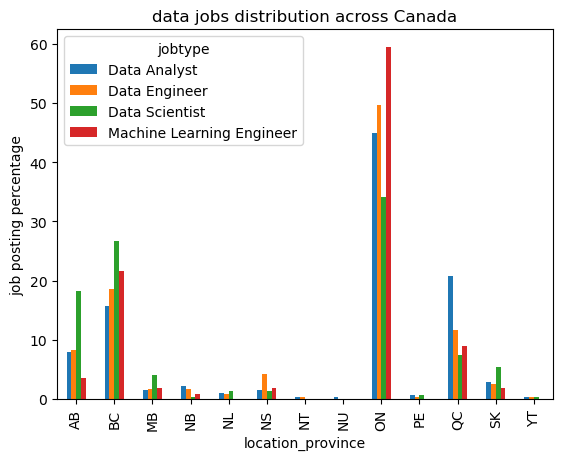

In [441]:
# define a dataframe df_prov to display the job listings distribution for the four different types across provinces in Canada
se_prov=Tdf_A.groupby('jobtype')['location_province'].value_counts(normalize=True)*100
df_prov=se_prov.unstack(0)
# bar plot for the job listing distribution across different provinces in canada
df_prov.plot(kind='bar', title='data jobs distribution across Canada')
plt.ylabel('job posting percentage')

In [399]:
# display the job posting distribution for the four different types across different cities in a specified province from a map 
#apply the function job_dist_in_cities_of_specific_pro by specifying the province to get the job distribution across cities
province='ON'
se_cities=Tdf.groupby('jobtype').apply(job_dist_in_cities_of_specific_pro, province)
# convert the series result to a dataframe by unstacking one level of the multi_level index
df_cities=se_cities.unstack(0)
# to replace all np.nan by 0
df_cities=df_cities.fillna(0)
# apply the function latitude_longitude_function to generate the (latitude, longitude) coordinate for each city
df_cities=latitude_longitude_function(df_cities, province)
#apply the function map_generation by specifying the required province related parameters to create a map
map_result=map_generation(center_latitude_ON, center_longitude_ON, df_cities)
#save the map_result to a website
map_result.save('map_ON.html') 

In [442]:
# work modality distribution over the three popular provinces (AB, ON, and BC) and jobtypes
#filter the Tdf_A dataframe to only display the three popular provinces
Tdf_A_filter=Tdf_A[(Tdf_A['location_province']=='ON') | (Tdf_A['location_province']=='BC') | (Tdf_A['location_province']=='AB')]
se_modalities=Tdf_A_filter.groupby(['location_province','jobtype'])['work_modality'].value_counts(normalize=True)*100
# Reset index to convert MultiIndex to columns
df_modalities=se_modalities.reset_index()

In [443]:
# use plotly to create the sunburst plot
fig = px.sunburst(df_modalities, 
                  path=['location_province', 'jobtype', 'work_modality'], 
                  values='proportion',
                  title='Job Listings Proportion by Province, Job Type, and Work Modality',
                  color='work_modality',
                  labels={'location_province': 'Province', 'work_modality': 'Work Modality', 'jobtype': 'Job Type', 'proportion': 'Proportion of Job Listings'},
                  hover_data={'proportion': True}
                 )
fig.show()

In [444]:
# analyze the competition status for remote work in the three popular provinces (AB, BC, ON)
#filter the dataframe to only display the work_modality of Remote in the three popular provinces
Tdf_A_filter2=Tdf_A_filter[Tdf_A_filter['work_modality']=="['Remote']"]
se_compe=Tdf_A_filter2.groupby(['location_province','jobtype'])['competition_level'].value_counts(normalize=True)*100
df_compe=se_compe.reset_index()

In [403]:
#use plotly to create bar plot
fig = px.bar(df_compe,
x='competition_level',
y='proportion',
color='jobtype',
barmode='group', 
facet_col='location_province', 
title='Applicants Level  Proportion for Remote Work by Province and Job Type',
labels={'competition_level': 'Applicants for Remote', 'proportion': 'Applicants Level Proportion', 'jobtype': 'Job Type', 'location_province': 'Province'},
color_discrete_map=color_map)
#show the plot
fig.show()

#### 3.2.2  Industry domain analysis

In [445]:
#Analyze the domain categories distribution in each of the four job types (DA, DS, DE, MLE) 

# Group by 'jobtype' and 'domain_category' to calculate value counts as a percentage
se_domain=Tdf_A.groupby('jobtype')['domain_category'].value_counts(normalize=True)*100
# Reset the index to convert Series to DataFrame
df_domain=se_domain.reset_index()
#Use plotly to create bar plot to display the industry domains distribution by job type
fig = px.bar(df_domain,
x='domain_category',
y='proportion',
color='jobtype',
barmode='group', 
title='Industry Domain Distribution by Job Type',
labels={'domain_category': 'Industry Domain', 'proportion': 'Industry Domain Proportion', 'jobtype': 'Job Type'},
color_discrete_map=color_map)
#show the plot
fig.show()

In [449]:
#Further analyze the distribution of the specific subdomains from the four most popular industry domain categories: 
#Finance, Technology, Business service, and Telecommunication

# Process each domain category
Tdf_A_Fin = process_domain_category(Tdf_A, 'Finance', domain_categories['Finance'], {'Bank,Banking': 'Bank', 'Investment,Bank,Banking': 'Investment,Bank'})
Tdf_A_Tec = process_domain_category(Tdf_A, 'Technology', domain_categories['Technology'])
Tdf_A_Bus = process_domain_category(Tdf_A, 'Business service', domain_categories['Business service'], {'Staffing,Recruiting': 'Human Resources'})
Tdf_A_Tel = process_domain_category(Tdf_A, 'Telecommunication', domain_categories['Telecommunication'], {'Telecommunication,Telecom': 'Telecom'})

# Concatenate the processed DataFrames
Tdf_A_domain = pd.concat([Tdf_A_Fin, Tdf_A_Tec, Tdf_A_Bus, Tdf_A_Tel])

# Group by 'jobtype' and 'specific_subdomain' and calculate value counts as a percentage
se_subdomains = Tdf_A_domain.groupby('jobtype')['specific_subdomain'].value_counts(normalize=True) * 100

# Reset the index to convert Series to DataFrame
df_subdomains = se_subdomains.reset_index()

#use plotly to create bar plot to display the subdomain distribution by job type
fig = px.bar(df_subdomains,
x='specific_subdomain',
y='proportion',
color='jobtype',
barmode='group', 
title='Distribution of Specific Subdomains from the Most Popular Industry Domain Categories by Job Type',
labels={'specific_subdomain': 'Industry Domain', 'proportion': 'Industry Domain Proportion', 'jobtype': 'Job Type'},
color_discrete_map=color_map)
fig.update_layout(
    width=900,  # Set the width in pixels
    height=400  # Set the height in pixels
)
#show the plot
fig.show()

In [451]:
# Analyze the years of experience (yoe) requirement in each of the popular subdomains

# Group by 'jobtype' ,'specific_subdomain' , and 'yoe_level' to calculate the value counts as a percentage
se_yoe=Tdf_A_domain.groupby(['jobtype','specific_subdomain'])['yoe_level'].value_counts(normalize=True)*100

# Reset the index to convert Series to DataFrame
df_yoe=se_yoe.reset_index()

#use plotly to create bar plot for each jobtype to display the yoe requirement in each of the popular subdomains
ls_jt=df_yoe['jobtype'].unique().tolist()
for item in ls_jt:
    fig = px.bar(df_yoe[df_yoe['jobtype']==item],
                 x='specific_subdomain',
                 y='proportion',             
                 color='yoe_level',
                 barmode='group', 
                 title=f'YOE Requirements for the Most Popular Industry Domains in {item}',
                 labels={'specific_subdomain': 'Popular Domains','yoe_level': 'Years of Experience Requirement', 'proportion': 'YOE Level Proportion'},
                )
   
#show the plot
    fig.update_layout(
        width=900,  # Set the width in pixels
        height=400 # Set the height in pixels
        ) 
    fig.show()

#### 3.2.3 Salary analysis

In [47]:
# Obtain the general payrange by job type
Tdf_A.groupby('jobtype').agg({'payrange_from':'min', 'payrange_to':'max'})

,payrange_from,payrange_to
jobtype,,
Data Analyst,50000.0,268400.0
Data Engineer,60000.0,399000.0
Data Scientist,57204.0,338000.0
Machine Learning Engineer,58000.0,336000.0


In [48]:
#obtain the payrange by both jobtype and yoe
Tdf_A.groupby(['jobtype','yoe_level']).agg({'payrange_from':'min', 'payrange_to':'max'}).unstack(0)

payrange_from                               \
jobtype      Data Analyst Data Engineer Data Scientist   
yoe_level                                                
0-5 years         50000.0       60000.0        58000.0   
10-15 years           NaN      107000.0        99300.0   
15+ years             NaN      197300.0       104000.0   
5-10 years        80000.0       69000.0        57204.0   

                                       payrange_to                \
jobtype     Machine Learning Engineer Data Analyst Data Engineer   
yoe_level                                                          
0-5 years                     58000.0     200000.0      350000.0   
10-15 years                  207000.0          NaN      300000.0   
15+ years                         NaN          NaN      399000.0   
5-10 years                    92190.0     268400.0      302000.0   

                                                      
jobtype     Data Scientist Machine Learning Engineer  
yoe_level                                             
0-5 years         249300.0                  279565.0  
10-15 years       202700.0                  336000.0  
15+ years         220000.0                       NaN  
5-10 years        327200.0                  300000.0